In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


In [16]:
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Seleccionar solo las dos primeras características y dos clases (Setosa y Versicolor)
X = X[y != 2, :2]  # Seleccionamos las características y filtramos la clase 2
y = y[y != 2]

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Crear el modelo Perceptrón
perceptron = Perceptron(max_iter=1000, random_state=42)

# Entrenar el modelo
perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

In [18]:
# Hacer predicciones
y_pred = perceptron.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del Perceptrón: {accuracy:.2f}")


Precisión del Perceptrón: 1.00


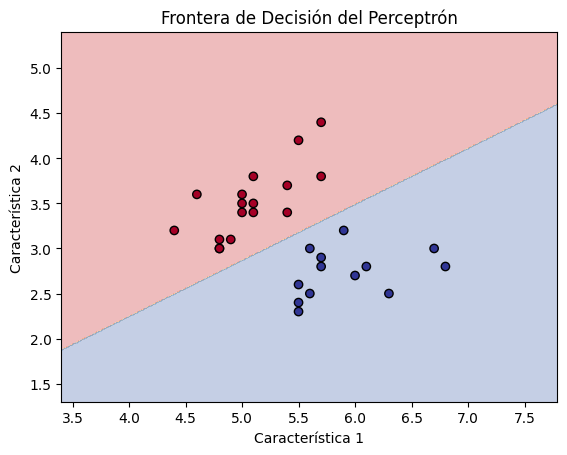

In [19]:
# Función para trazar la frontera de decisión
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Frontera de Decisión del Perceptrón')
    plt.show()

# Graficar la frontera de decisión
plot_decision_boundary(X_test, y_test, perceptron)
